<a href="https://colab.research.google.com/github/buachompoo29/CreditCardChurnPrediction/blob/main/Part_I_Churn_Predictive_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Name

1. post-data preparation and feature engineering dataset: df (churn_df_cleaned_oh.csv)
2. after one-hot encoding dataset: df_encoded (churn_df_oh_encoded.csv)

3. X_train dataset = X_train_adasyn (X_train_smote7030_oh.csv)

4. y_train dataset = y_train_adasyn (y_train_smote7030_oh.csv)

5. X_test dataset = X_test (churn_X_test_oh.csv)

6. y_test dataset = y_test (churn_y_test_oh.csv)

[drive link for dataset](https://drive.google.com/drive/folders/1c5QzJBwhO7N0C6ZdTptf7jAb-a25LnSW?usp=share_link)

Evaluation Metric :  recall and balanced accuracy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML_Oct_2024/credit_card_churn.csv")

In [ ]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#EDA before data preparation

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
columns_to_drop = [
    "CLIENTNUM",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Ct_Chng_Q4_Q1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
]

df = df.drop(columns=columns_to_drop)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Total_

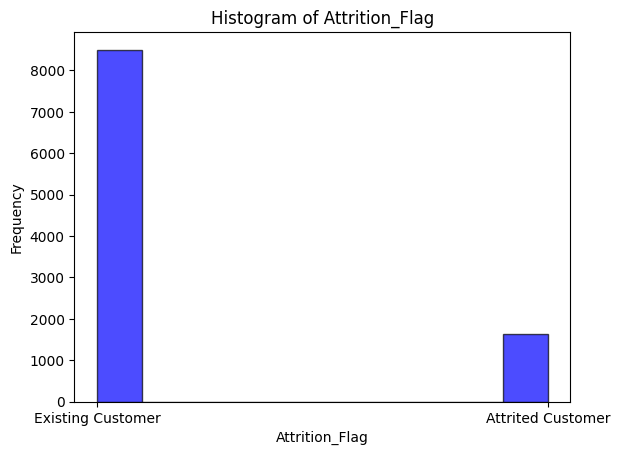

In [ ]:
plt.figure()
plt.hist(df['Attrition_Flag'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Attrition_Flag')
plt.xlabel('Attrition_Flag')
plt.ylabel('Frequency')
plt.show()

#Imbalanced Data

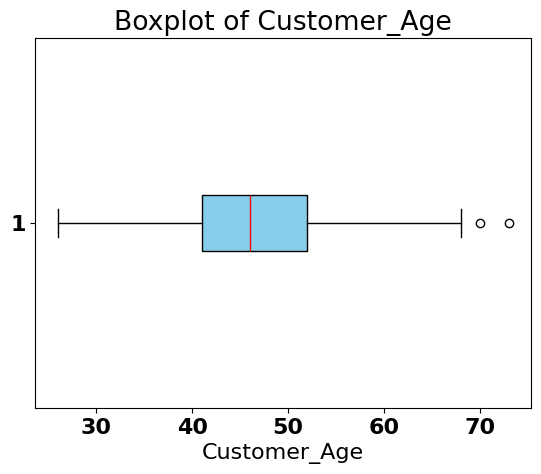

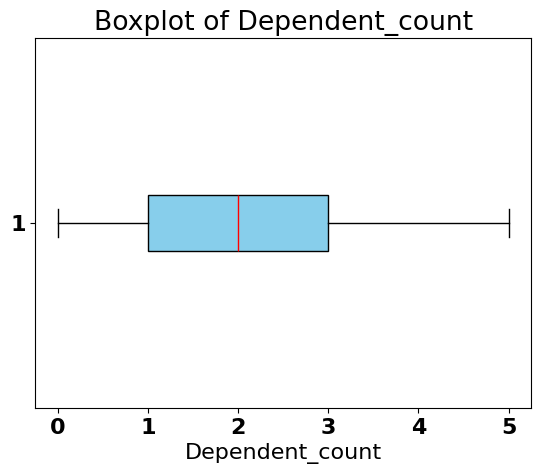

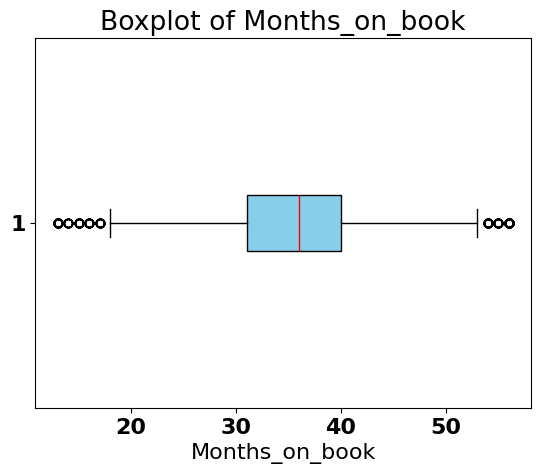

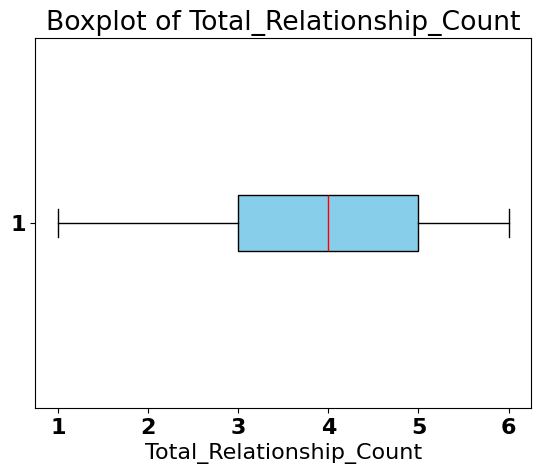

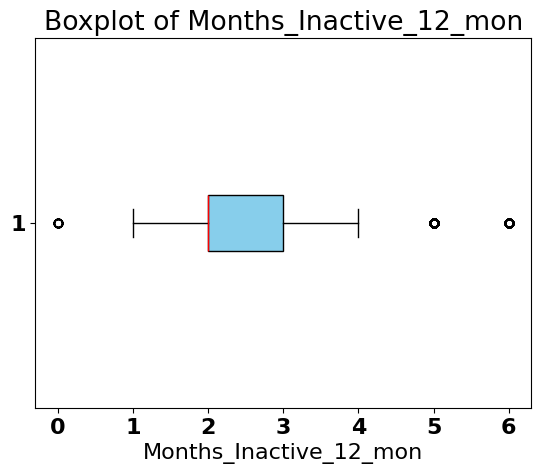

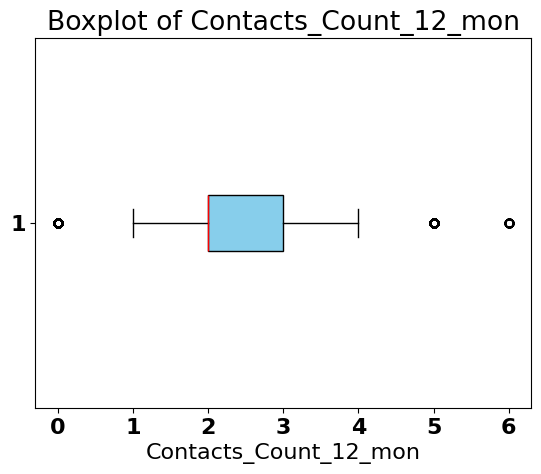

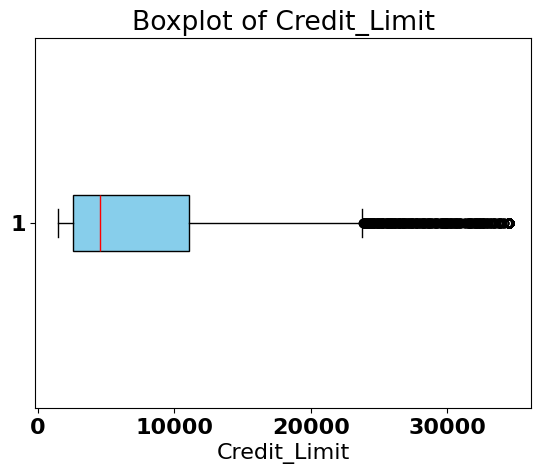

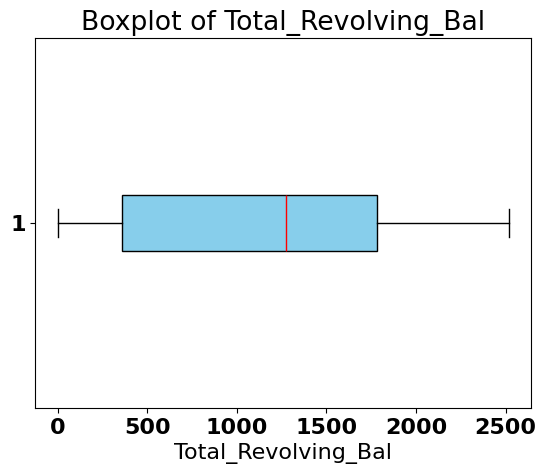

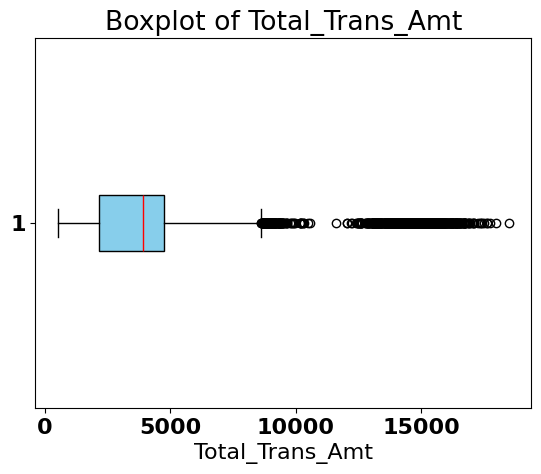

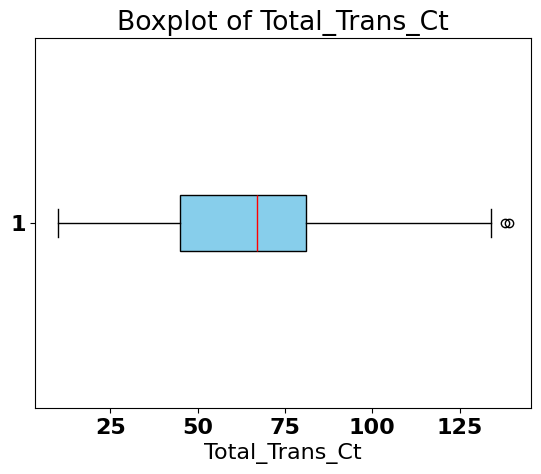

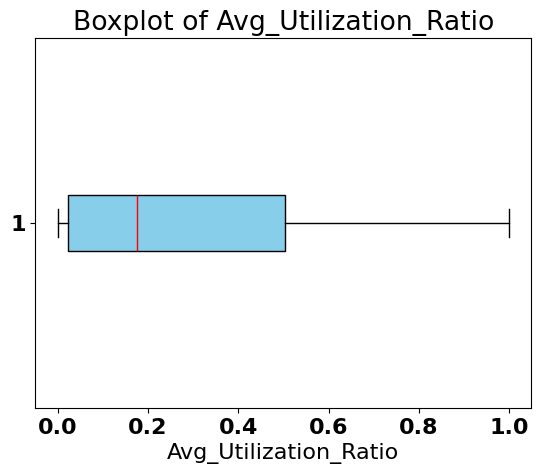

In [ ]:
# Generate boxplots only for numeric columns
for column in df.select_dtypes(include='number').columns:
    plt.figure()
    plt.boxplot(df[column], vert=False, patch_artist=True,
                boxprops=dict(facecolor="skyblue", color="black"),
                medianprops=dict(color="red"))
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


# justify outliers

In [ ]:
outliers_count = {}
# for each numerical features
for column in df.select_dtypes(include='number').columns:
    # Cal Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # IQR

    # Define outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers in the current column
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

# Display outliers_count for each feature
outliers_count

{'Customer_Age': 2,
 'Dependent_count': 0,
 'Months_on_book': 386,
 'Total_Relationship_Count': 0,
 'Months_Inactive_12_mon': 331,
 'Contacts_Count_12_mon': 629,
 'Credit_Limit': 984,
 'Total_Revolving_Bal': 0,
 'Total_Trans_Amt': 896,
 'Total_Trans_Ct': 2,
 'Avg_Utilization_Ratio': 0}

In [ ]:
outliers_indices = {}
# Iterate through each numerical column in the DataFrame
for column in df.select_dtypes(include='number').columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_indices[column] = set(outliers.index)  # set of indices

# Find common outliers across all features
if outliers_indices:
    common_outliers = set.intersection(*outliers_indices.values())
else:
    common_outliers = set()  # If no numerical columns, set common_outliers to an empty set

# Find all unique (non-overlapping) outliers for all features
all_unique_outliers = set.union(*outliers_indices.values())

outlier_count_per_feature = {col: len(indices) for col, indices in outliers_indices.items()}
print("Common outliers across all features:", common_outliers)
print("Number of common outliers:", len(common_outliers))
print("Total number of unique (non-overlapping) outliers:", len(all_unique_outliers))


Common outliers across all features: set()
Number of common outliers: 0
Total number of unique (non-overlapping) outliers: 2793


In [ ]:
len(all_unique_outliers)/len(df)

0.275797373358349

about 27.6% of the dataset consists of unique (non-overlapping) outliers. *So*, we have decided not to remove these outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Total_

#Non-numeric to numeric

In [ ]:
column1 = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Iterate through each specified column
for column in column1:
    print(f"\nCounts for column: {column}")
    # Iterate through unique values in the current column
    for unique_value in df[column].unique():
        count = df[df[column] == unique_value].shape[0]
        print(f"Value: {unique_value}, Count: {count}")



Counts for column: Attrition_Flag
Value: Existing Customer, Count: 8500
Value: Attrited Customer, Count: 1627

Counts for column: Gender
Value: M, Count: 4769
Value: F, Count: 5358

Counts for column: Education_Level
Value: High School, Count: 2013
Value: Graduate, Count: 3128
Value: Uneducated, Count: 1487
Value: Unknown, Count: 1519
Value: College, Count: 1013
Value: Post-Graduate, Count: 516
Value: Doctorate, Count: 451

Counts for column: Marital_Status
Value: Married, Count: 4687
Value: Single, Count: 3943
Value: Unknown, Count: 749
Value: Divorced, Count: 748

Counts for column: Income_Category
Value: $60K - $80K, Count: 1402
Value: Less than $40K, Count: 3561
Value: $80K - $120K, Count: 1535
Value: $40K - $60K, Count: 1790
Value: $120K +, Count: 727
Value: Unknown, Count: 1112

Counts for column: Card_Category
Value: Blue, Count: 9436
Value: Gold, Count: 116
Value: Silver, Count: 555
Value: Platinum, Count: 20


In [ ]:
# Define the columns you want to map
columns_to_map = ['Attrition_Flag', 'Gender']  # Add other columns if needed

# Define a dictionary with mappings for each column
mapping_dict = {
    'Attrition_Flag': {'Existing Customer': 0, 'Attrited Customer': 1},
    'Gender': {'M': 0, 'F': 1},
    # Add more mappings if needed
}

# Function to apply mappings based on column
def apply_mapping(df, columns, mapping_dict):
    for column in columns:
        if column in mapping_dict:  # Check if a mapping exists for the column
            df[column] = df[column].map(mapping_dict[column])
    return df

# Apply the function
df = apply_mapping(df, columns_to_map, mapping_dict)

# Display the result to confirm
print(df[columns_to_map].head())


   Attrition_Flag  Gender
0               0       0
1               0       1
2               0       0
3               0       1
4               0       0


In [ ]:
#max_age = df['Customer_Age'].max()
#print(max_age)
#min_age = df['Customer_Age'].min()
#print(min_age)


In [ ]:
# Define age bins and labels
#bins = [25, 35, 45, 55, 68]  # Define the edges of the bins
#labels = ['26-35', '36-45', '46-55', '56-68']  # Labels for each bin

# Create age groups
#df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=True)

# Display the counts for each age group to confirm
#print(df['Age_Group'].value_counts())


In [ ]:
#df = df.drop(columns=['Customer_Age'])
#print(df.head())

In [ ]:
import pandas as pd
# Apply one-hot encoding to the specified columns
columns_to_encode = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode, drop_first=False)

for column in df_encoded.columns:
  if df_encoded[column].dtype == bool:
    df_encoded[column] = df_encoded[column].astype(int)

# Display the DataFrame after one-hot encoding and changing dtype
print("\nDataFrame after One-Hot Encoding and changing dtype to int:")
print(df_encoded.head())
df_encoded.info()


DataFrame after One-Hot Encoding and changing dtype to int:
   Attrition_Flag  Customer_Age  Gender  Dependent_count  Months_on_book  \
0               0            45       0                3              39   
1               0            49       1                5              44   
2               0            51       0                3              36   
3               0            40       1                4              34   
4               0            40       0                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Lim

#Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df_encoded.drop('Attrition_Flag', axis=1)
y = df_encoded['Attrition_Flag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=19,shuffle=True)

#Handling imbalanced dataset

##SMOTE

In [ ]:
X_train_1=X_train
X_train_2=X_train
X_train_3=X_train

y_train_1=y_train
y_train_2=y_train
y_train_3=y_train




In [ ]:
from imblearn.over_sampling import SMOTE


# Apply SMOTE to achieve 50:50 ratio
smote_50_50 = SMOTE(sampling_strategy='auto', random_state=19)  # 'auto' will balance to the majority class
X_resampled_50_50, y_resampled_50_50 = smote_50_50.fit_resample(X_train_2, y_train_2)

In [ ]:
y_resampled_50_50

,Attrition_Flag
0,0
1,0
2,0
3,0
4,0
...,...
13565,1
13566,1
13567,1
13568,1


#Finalized: Using SMOTE 70:30

In [ ]:
minority_count = int(0.3 * (y.value_counts()[0] / 0.7))
smote_70_30 = SMOTE(sampling_strategy={1: minority_count}, random_state=19)
X_resampled_70_30, y_resampled_70_30 = smote_70_30.fit_resample(X_train_3,y_train_3)

y_resampled_70_30

,Attrition_Flag
0,0
1,0
2,0
3,0
4,0
...,...
10422,1
10423,1
10424,1
10425,1


#1st Technique: Logistic Regression

In [ ]:
pip install scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_5050_std=scaler.fit_transform(X_resampled_50_50)
X_7030_std=scaler.fit_transform(X_resampled_70_30)
X_og_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)


###Evaluation Model 1: SMOTE Balanced data (50:50)

In [ ]:
model1 = LogisticRegression()
model1.fit(X_5050_std, y_resampled_50_50)
y_pred = model1.predict(X_test_std)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.2211253701875617
Confusion Matrix:
 [[ 137 1578]
 [   0  311]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.08      0.15      1715
           1       0.16      1.00      0.28       311

    accuracy                           0.22      2026
   macro avg       0.58      0.54      0.22      2026
weighted avg       0.87      0.22      0.17      2026



###Evaluation Model 2: SMOTE 70:30

In [ ]:
model2 = LogisticRegression()
model2.fit(X_7030_std, y_resampled_70_30)
y_pred = model2.predict(X_test_std)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)


Accuracy: 0.6702862783810464
Confusion Matrix:
 [[1067  648]
 [  20  291]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.62      0.76      1715
           1       0.31      0.94      0.47       311

    accuracy                           0.67      2026
   macro avg       0.65      0.78      0.61      2026
weighted avg       0.88      0.67      0.72      2026



###Evaluation Model 3: Original Data

In [ ]:
model3 = LogisticRegression()
model3.fit(X_og_std, y_train_1)
y_pred = model3.predict(X_test_std)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)


Accuracy: 0.9076999012833169
Confusion Matrix:
 [[1674   41]
 [ 146  165]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1715
           1       0.80      0.53      0.64       311

    accuracy                           0.91      2026
   macro avg       0.86      0.75      0.79      2026
weighted avg       0.90      0.91      0.90      2026



#2nd Technique: Random Forest

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
X_train_smote7030 =X_resampled_70_30.copy()
Y_train_smote7030 = y_resampled_70_30.copy()
Y_test=y_test.copy()

### Training model

In [ ]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

#Define the parameter grid:
param_grid = {
    'n_estimators': [10,50,100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None]
    }
#finds the best combination of hyperparameters
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=10, cv=5,scoring='recall',verbose=2, random_state=42, n_jobs=-1)
#This step fits RandomizedSearchCV on the training data (X_train_smote7030, Y_train_smote7030)
rf_random.fit(X_train_smote7030, Y_train_smote7030)
print("Best Parameters:",rf_random.best_params_)
print("Best Score:",rf_random.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 20}
Best Score: 0.9223439454920935


In [ ]:
#Initialize the RandomForestClassifier with specified hyperparameters
rf1=RandomForestClassifier(n_estimators=200,max_depth=20,random_state=42)
rf1.fit(X_train_smote7030, Y_train_smote7030)


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)


### Prediction

In [ ]:
# Predictions on the test set
rf_y_pred_test =  rf1.predict(X_test)
rf_y_predprob_test =  rf1.predict_proba(X_test)
# Print class and probability predictions for a single test instance (index 1 as an example)
print('Test set record')
print('Class prediction : {}'.format(rf_y_pred_test[1]))
print('Probability prediction : {}'.format(rf_y_predprob_test[1]))

Test set record
Class prediction : 0
Probability prediction : [0.86151316 0.13848684]


In [ ]:
#Compare between the actual target classes and the predicted target classes
# Print the actual target classes for the first 10 rows in the test set
print('Target classes of the first five rows are {}'.format(Y_test.values[0:10]))
# Print the predicted target classes for the first 10 rows in the test set
print('Predicted classes of the first five rows are {}'.format(rf_y_pred_test[0:10]))

Target classes of the first five rows are [1 0 0 0 0 0 1 0 1 0]
Predicted classes of the first five rows are [1 0 0 0 0 0 1 0 1 0]


### Feature_importances

In [ ]:
feature_importances = pd.DataFrame(rf1.feature_importances_,
                                   index = X_train_smote7030.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print("Feature importances:\n",feature_importances)

Feature importances:
                                 importance
Total_Trans_Ct                    0.222811
Total_Trans_Amt                   0.210994
Total_Revolving_Bal               0.113248
Avg_Utilization_Ratio             0.072877
Total_Relationship_Count          0.069661
Credit_Limit                      0.044944
Customer_Age                      0.036970
Months_on_book                    0.028054
Months_Inactive_12_mon            0.025443
Marital_Status_Married            0.022968
Contacts_Count_12_mon             0.022914
Dependent_count                   0.015710
Education_Level_Graduate          0.011582
Marital_Status_Single             0.010658
Income_Category_$60K - $80K       0.009196
Gender                            0.008671
Income_Category_$80K - $120K      0.008085
Education_Level_High School       0.007966
Education_Level_Uneducated        0.007100
Income_Category_$40K - $60K       0.006637
Marital_Status_Divorced           0.005425
Education_Level_College         

### Confusion metrix plot

In [ ]:
#Generates a confusion matrix visualization
def cm_plot(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm)
    classNames = ['Existing Customer' ,'Attrited Customer']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    plt.grid(None)
    plt.rcParams.update({'font.size': 16})
    plt.rcParams["font.weight"] = "bold"
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

### Evaluation

Test set | Accuracy is 94.07699901283317
Test set | Balance Accuracy is 88.20957505648101


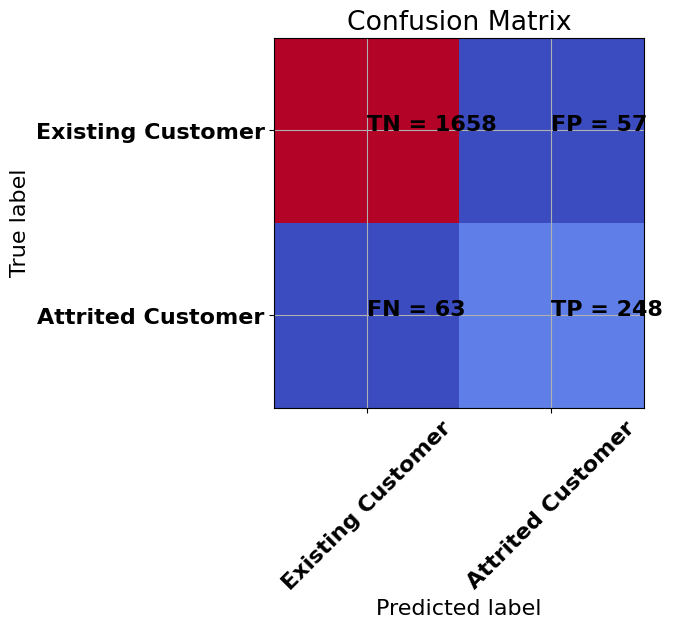

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1715
           1       0.81      0.80      0.81       311

    accuracy                           0.94      2026
   macro avg       0.89      0.88      0.89      2026
weighted avg       0.94      0.94      0.94      2026



In [ ]:
test_acc = accuracy_score(Y_test,rf_y_pred_test)*100
test_bl_acc = balanced_accuracy_score(Y_test,rf_y_pred_test)*100
test_cm = confusion_matrix(Y_test,rf_y_pred_test)
test_report = classification_report(Y_test,rf_y_pred_test)

print("Test set | Accuracy is", test_acc)
print("Test set | Balance Accuracy is", test_bl_acc)
cm_plot(test_cm)
print(test_report)

#3rd Technique: XGBoost

### Import Libraries


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [ ]:
#Find optimal hyperparameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

#Define the hyperparameter to try
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

xgb = XGBClassifier()

#Specifies that recall should be used as the metric for selecting the best model.
#Specifies 5-fold cross-validation. The dataset will be split into five parts, training on four and validating on the fifth in turn.
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='recall', cv=5)

grid_search.fit(X_train_smote7030, Y_train_smote7030)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best cross-validation score: 0.9453997648442094


### Training model

In [ ]:
from  xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, max_depth=10, n_estimators=200)
xgb.fit(X_train_smote7030,Y_train_smote7030)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Prediction

In [ ]:
xgb_y_pred_test = xgb.predict(X_test)
print("Display First 10 Predictions")
print(xgb_y_pred_test[0:10])
print("Display First 10 Test value")
print(y_test.values[0:10])

Display First 10 Predictions
[1 0 0 0 0 0 1 0 1 0]
Display First 10 Test value
[1 0 0 0 0 0 1 0 1 0]


###Feature_importances

In [ ]:
importances = xgb.feature_importances_
importances
#These scores indicate the relative importance of each feature in making predictions.

array([0.02322743, 0.01029222, 0.00976637, 0.01011965, 0.09737696,
       0.02022554, 0.01641   , 0.01543001, 0.07983769, 0.05619287,
       0.22238894, 0.01410574, 0.01915636, 0.02368511, 0.01662716,
       0.0197968 , 0.02137169, 0.01910084, 0.0146092 , 0.06450233,
       0.03878171, 0.0223993 , 0.05279823, 0.01236343, 0.0132602 ,
       0.0220028 , 0.02531746, 0.00820583, 0.01090127, 0.00834589,
       0.        , 0.        , 0.01140096], dtype=float32)

In [ ]:
#Convert feature name in the X_test to list format
feature_names = X_test.columns.tolist()

In [ ]:
#Combine feature names and their importances in a DataFrame
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance, if desired
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

#Features with higher importance values have more influence on the model's predictions.

In [ ]:
feature_importances_df

,Feature,Importance
0,Total_Trans_Ct,0.222389
1,Total_Relationship_Count,0.097377
2,Total_Revolving_Bal,0.079838
3,Marital_Status_Divorced,0.064502
4,Total_Trans_Amt,0.056193
5,Marital_Status_Unknown,0.052798
6,Marital_Status_Married,0.038782
7,Income_Category_$80K - $120K,0.025317
8,Education_Level_Doctorate,0.023685
9,Customer_Age,0.023227


###Evaluation

In [ ]:
test_acc = accuracy_score(y_test,xgb_y_pred_test)*100
test_bl_acc = balanced_accuracy_score(y_test,xgb_y_pred_test)*100
test_cm = confusion_matrix(y_test,xgb_y_pred_test)
test_report = classification_report(y_test,xgb_y_pred_test)

print("Test set | Accuracy is", test_acc, "%")
print("Test set | Balance Accuracy is", test_bl_acc, "%")
print("Confusion Matrix:\n", test_cm)
print(test_report)

Test set | Accuracy is 95.55774925962488 %
Test set | Balance Accuracy is 91.05846840343854 %
Confusion Matrix:
 [[1673   42]
 [  48  263]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1715
           1       0.86      0.85      0.85       311

    accuracy                           0.96      2026
   macro avg       0.92      0.91      0.91      2026
weighted avg       0.96      0.96      0.96      2026

